# # BƯỚC 3: KHAI PHÁ LUẬT KẾT HỢP VỚI APRIORI
# 
# **Mục tiêu:**
# - Áp dụng thuật toán Apriori để tìm tập phổ biến
# - Sinh luật kết hợp với các chỉ số support, confidence, lift
# - Trực quan hóa kết quả
# - Rút ra insight kinh doanh

In [1]:
import sys
sys.path.append('../src')

from apriori_library import AssociationRulesMiner, DataVisualizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style cho biểu đồ
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
# Tải basket boolean
basket_bool = pd.read_parquet('../data/processed/basket_bool.parquet')
print(f"Kích thước basket_bool: {basket_bool.shape}")
print(f"Số lượng giao dịch: {basket_bool.shape[0]}")
print(f"Số lượng sản phẩm: {basket_bool.shape[1]}")

Kích thước basket_bool: (16646, 3844)
Số lượng giao dịch: 16646
Số lượng sản phẩm: 3844


In [3]:
# Khởi tạo AssociationRulesMiner
miner = AssociationRulesMiner(basket_bool)

# Tìm tập phổ biến với min_support = 0.01 (1%)
print("ĐANG TÌM CÁC TẬP PHỔ BIẾN...")
frequent_itemsets = miner.find_frequent_itemsets(min_support=0.01)

print("\nTHÔNG TIN VỀ CÁC TẬP PHỔ BIẾN:")
print(f"- Tổng số tập phổ biến: {len(frequent_itemsets)}")
print(f"- Kích thước tập lớn nhất: {frequent_itemsets['itemsets'].apply(len).max()}")

# Hiển thị top 10 itemset
print("\nTop 10 itemset phổ biến nhất:")
print(frequent_itemsets.nlargest(10, 'support')[['support', 'itemsets']])

ĐANG TÌM CÁC TẬP PHỔ BIẾN...
Tìm thấy 970 tập phổ biến

THÔNG TIN VỀ CÁC TẬP PHỔ BIẾN:
- Tổng số tập phổ biến: 970
- Kích thước tập lớn nhất: 4

Top 10 itemset phổ biến nhất:
      support                              itemsets
582  0.113180  (WHITE HANGING HEART T-LIGHT HOLDER)
250  0.086928             (JUMBO BAG RED RETROSPOT)
413  0.084705            (REGENCY CAKESTAND 3 TIER)
38   0.078097       (ASSORTED COLOUR BIRD ORNAMENT)
340  0.077496                       (PARTY BUNTING)
285  0.067283             (LUNCH BAG RED RETROSPOT)
466  0.060495   (SET OF 3 CAKE TINS PANTRY DESIGN )
277  0.059834             (LUNCH BAG  BLACK SKULL.)
334  0.056770     (PAPER CHAIN KIT 50'S CHRISTMAS )
308  0.056350     (NATURAL SLATE HEART CHALKBOARD )


In [4]:
# Sinh luật kết hợp
print("\nĐANG SINH LUẬT KẾT HỢP...")
rules = miner.generate_rules(min_confidence=0.3, min_lift=1.2)

print("\nTHÔNG TIN VỀ CÁC LUẬT:")
print(f"- Tổng số luật: {len(rules)}")
print(f"- Support trung bình: {rules['support'].mean():.4f}")
print(f"- Confidence trung bình: {rules['confidence'].mean():.4f}")
print(f"- Lift trung bình: {rules['lift'].mean():.4f}")


ĐANG SINH LUẬT KẾT HỢP...
Sinh được 615 luật kết hợp

THÔNG TIN VỀ CÁC LUẬT:
- Tổng số luật: 615
- Support trung bình: 0.0141
- Confidence trung bình: 0.5000
- Lift trung bình: 13.9494


In [5]:
# Hiển thị top 10 luật
print("\nTOP 10 LUẬT CÓ LIFT CAO NHẤT:")
top_rules = rules.nlargest(10, 'lift')

for i, (idx, row) in enumerate(top_rules.iterrows(), 1):
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    print(f"\n{i}. {antecedents} → {consequents}")
    print(f"   Support: {row['support']:.4f}, Confidence: {row['confidence']:.4f}, Lift: {row['lift']:.4f}")


TOP 10 LUẬT CÓ LIFT CAO NHẤT:

1. HERB MARKER THYME → HERB MARKER ROSEMARY
   Support: 0.0102, Confidence: 0.9441, Lift: 86.8290

2. HERB MARKER ROSEMARY → HERB MARKER THYME
   Support: 0.0102, Confidence: 0.9337, Lift: 86.8290

3. REGENCY TEA PLATE GREEN  → REGENCY TEA PLATE ROSES 
   Support: 0.0115, Confidence: 0.8458, Lift: 52.9302

4. REGENCY TEA PLATE ROSES  → REGENCY TEA PLATE GREEN 
   Support: 0.0115, Confidence: 0.7218, Lift: 52.9302

5. POPPY'S PLAYHOUSE LIVINGROOM  → POPPY'S PLAYHOUSE BEDROOM 
   Support: 0.0102, Confidence: 0.8086, Lift: 51.7699

6. POPPY'S PLAYHOUSE BEDROOM  → POPPY'S PLAYHOUSE LIVINGROOM 
   Support: 0.0102, Confidence: 0.6500, Lift: 51.7699

7. SET OF 3 WOODEN STOCKING DECORATION → SET OF 3 WOODEN TREE DECORATIONS
   Support: 0.0103, Confidence: 0.6908, Lift: 50.2115

8. SET OF 3 WOODEN TREE DECORATIONS → SET OF 3 WOODEN STOCKING DECORATION
   Support: 0.0103, Confidence: 0.7511, Lift: 50.2115

9. POPPY'S PLAYHOUSE LIVINGROOM  → POPPY'S PLAYHOUSE KITCH


=== BIỂU ĐỒ TOP 20 ITEMSET PHỔ BIẾN ===


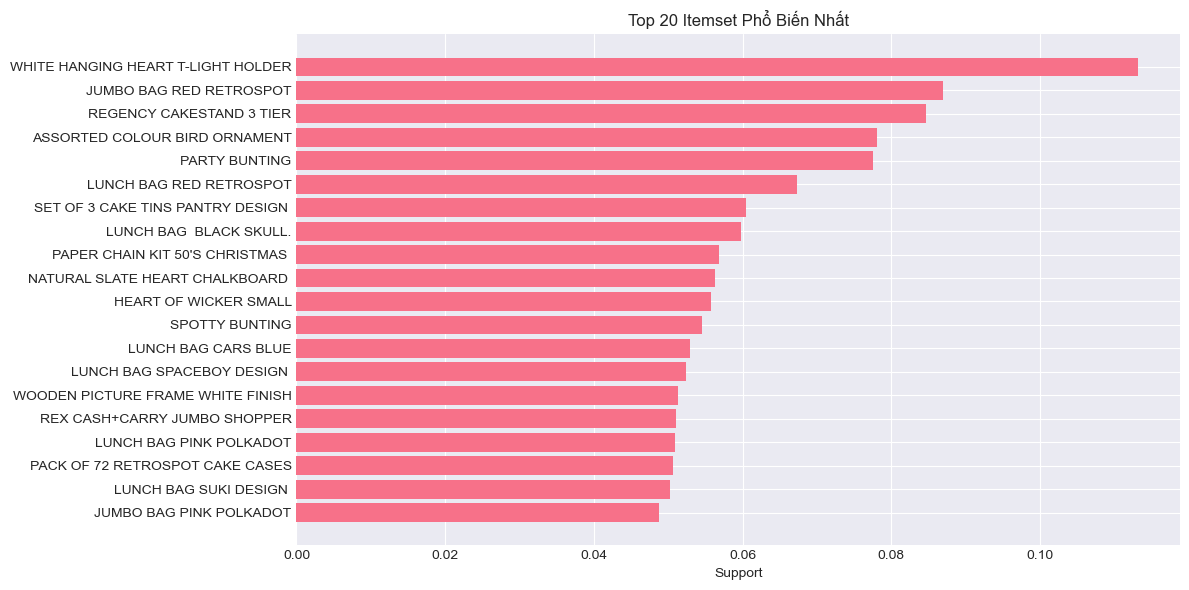

In [6]:
# Khởi tạo DataVisualizer
visualizer = DataVisualizer()

# 1. Vẽ biểu đồ top itemset
print("\n=== BIỂU ĐỒ TOP 20 ITEMSET PHỔ BIẾN ===")
visualizer.plot_top_itemsets(frequent_itemsets, top_n=20)


=== BIỂU ĐỒ TOP 15 LUẬT THEO LIFT ===


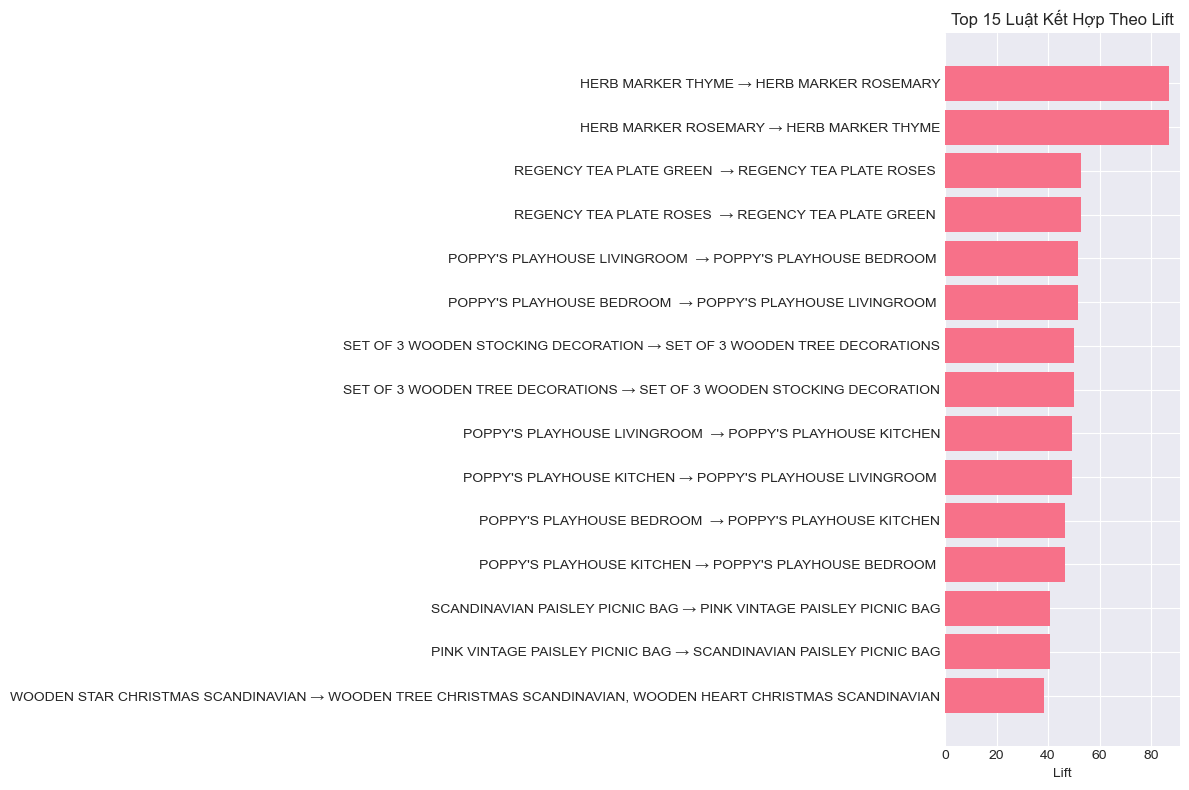

In [7]:
# 2. Vẽ biểu đồ top luật theo lift
print("\n=== BIỂU ĐỒ TOP 15 LUẬT THEO LIFT ===")
visualizer.plot_top_rules(rules, top_n=15, metric='lift')


=== BIỂU ĐỒ PHÂN TÁN: SUPPORT VS CONFIDENCE ===


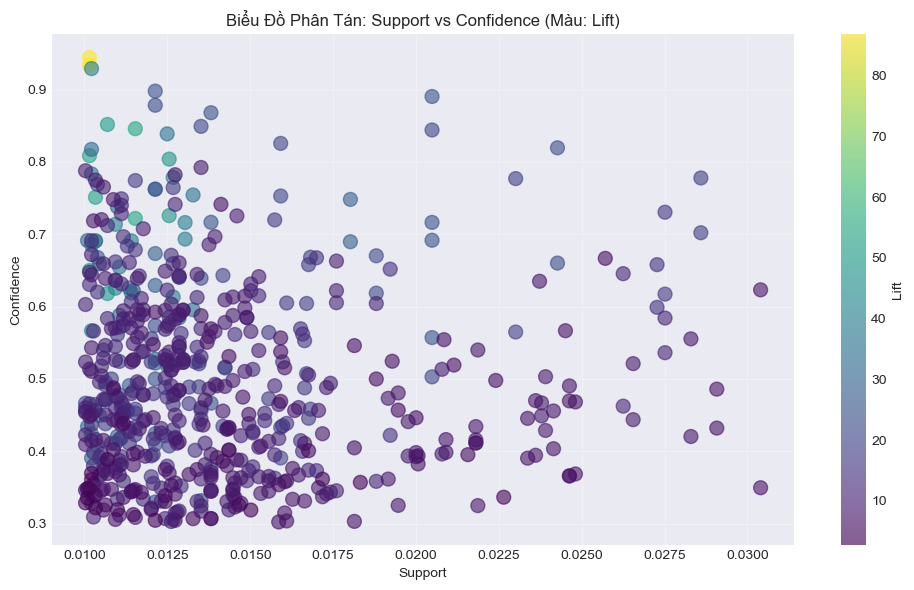

In [8]:
# 3. Vẽ scatter plot support vs confidence
print("\n=== BIỂU ĐỒ PHÂN TÁN: SUPPORT VS CONFIDENCE ===")
visualizer.plot_scatter_rules(rules)


=== NETWORK GRAPH CỦA CÁC LUẬT ===


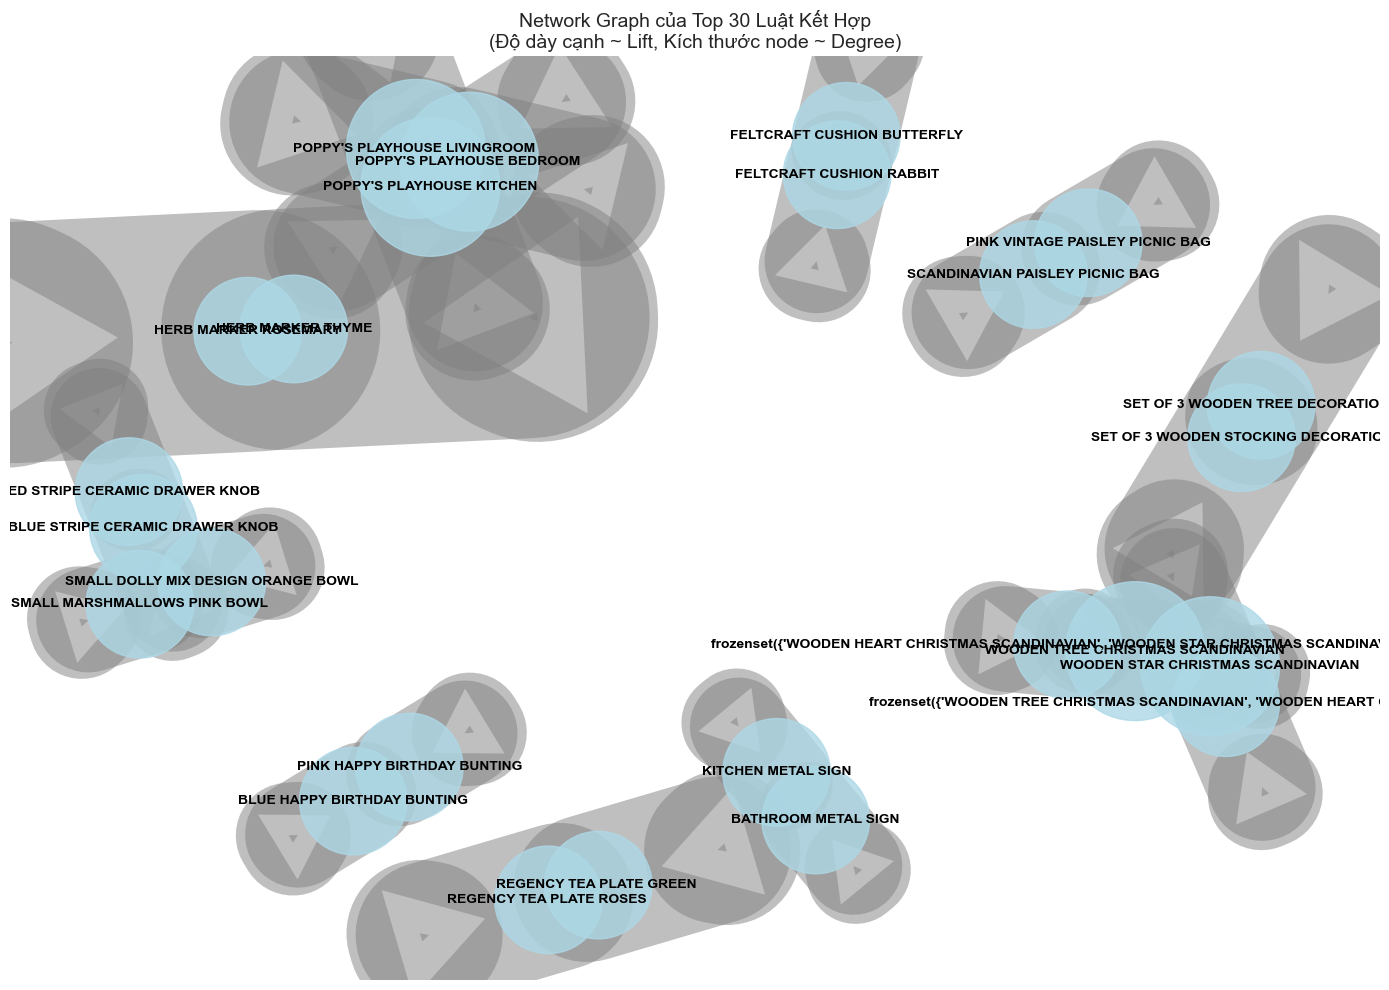


=== THÔNG TIN CÁC SẢN PHẨM QUAN TRỌNG ===

Top 5 sản phẩm có nhiều kết nối nhất (Hub):
  • POPPY'S PLAYHOUSE LIVINGROOM : Degree Centrality = 0.167
  • POPPY'S PLAYHOUSE BEDROOM : Degree Centrality = 0.167
  • POPPY'S PLAYHOUSE KITCHEN: Degree Centrality = 0.167
  • WOODEN STAR CHRISTMAS SCANDINAVIAN: Degree Centrality = 0.167
  • WOODEN TREE CHRISTMAS SCANDINAVIAN: Degree Centrality = 0.167


In [9]:
# 4. Vẽ network graph
print("\n=== NETWORK GRAPH CỦA CÁC LUẬT ===")
visualizer.plot_network_graph(rules, top_n=30)

In [10]:
# PHÂN TÍCH VÀ RÚT RA INSIGHT

print("\n" + "="*60)
print("PHÂN TÍCH VÀ INSIGHT KINH DOANH")
print("="*60)

# 1. Tìm sản phẩm xuất hiện nhiều nhất trong luật
print("\n1. PHÂN TÍCH SẢN PHẨM TRUNG TÂM (HUB):")

# Đếm số lần xuất hiện của mỗi sản phẩm trong antecedents và consequents
product_counts = {}

for _, row in rules.iterrows():
    for product in row['antecedents']:
        product_counts[product] = product_counts.get(product, 0) + 1
    for product in row['consequents']:
        product_counts[product] = product_counts.get(product, 0) + 1

# Sắp xếp và lấy top 10
sorted_products = sorted(product_counts.items(), key=lambda x: x[1], reverse=True)

print("\nTop 10 sản phẩm xuất hiện nhiều nhất trong các luật:")
for i, (product, count) in enumerate(sorted_products[:10], 1):
    print(f"{i}. {product}: {count} lần")



PHÂN TÍCH VÀ INSIGHT KINH DOANH

1. PHÂN TÍCH SẢN PHẨM TRUNG TÂM (HUB):

Top 10 sản phẩm xuất hiện nhiều nhất trong các luật:
1. LUNCH BAG RED RETROSPOT: 106 lần
2. LUNCH BAG  BLACK SKULL.: 90 lần
3. LUNCH BAG CARS BLUE: 76 lần
4. LUNCH BAG PINK POLKADOT: 75 lần
5. LUNCH BAG SPACEBOY DESIGN : 70 lần
6. LUNCH BAG SUKI DESIGN : 63 lần
7. LUNCH BAG WOODLAND: 61 lần
8. JUMBO BAG RED RETROSPOT: 51 lần
9. LUNCH BAG APPLE DESIGN: 40 lần
10. JUMBO BAG PINK POLKADOT: 34 lần


In [11]:
# 2. Phân tích luật mạnh
print("\n2. PHÂN TÍCH CÁC LUẬT MẠNH (SUPPORT > 0.02, CONFIDENCE > 0.5, LIFT > 2):")

strong_rules = rules[
    (rules['support'] > 0.02) & 
    (rules['confidence'] > 0.5) & 
    (rules['lift'] > 2)
]

print(f"\nTìm thấy {len(strong_rules)} luật mạnh:")

for i, (idx, row) in enumerate(strong_rules.head(10).iterrows(), 1):
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    print(f"\n{i}. {antecedents} → {consequents}")
    print(f"   Support: {row['support']:.3f}, Confidence: {row['confidence']:.3f}, Lift: {row['lift']:.3f}")



2. PHÂN TÍCH CÁC LUẬT MẠNH (SUPPORT > 0.02, CONFIDENCE > 0.5, LIFT > 2):

Tìm thấy 30 luật mạnh:

1. GREEN REGENCY TEACUP AND SAUCER → PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER 
   Support: 0.020, Confidence: 0.557, Lift: 24.217

2. PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER  → GREEN REGENCY TEACUP AND SAUCER
   Support: 0.020, Confidence: 0.890, Lift: 24.217

3. PINK REGENCY TEACUP AND SAUCER → GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER 
   Support: 0.020, Confidence: 0.692, Lift: 24.189

4. GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER  → PINK REGENCY TEACUP AND SAUCER
   Support: 0.020, Confidence: 0.716, Lift: 24.189

5. GREEN REGENCY TEACUP AND SAUCER → PINK REGENCY TEACUP AND SAUCER
   Support: 0.024, Confidence: 0.660, Lift: 22.289

6. PINK REGENCY TEACUP AND SAUCER → GREEN REGENCY TEACUP AND SAUCER
   Support: 0.024, Confidence: 0.819, Lift: 22.289

7. GREEN REGENCY TEACUP AND SAUCER, PINK REGE

In [12]:
# 3. Đề xuất kinh doanh từ các luật mạnh
print("\n" + "="*60)
print("ĐỀ XUẤT KINH DOANH")
print("="*60)

print("\nDựa trên phân tích, đề xuất các chiến lược sau:")
print("\n1. COMBO SẢN PHẨM NÊN TẠO:")
for _, row in strong_rules.head(5).iterrows():
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    print(f"   • Combo '{antecedents} + {consequents}' với giá ưu đãi")

print("\n2. VỊ TRÍ TRƯNG BÀY:")
print("   • Đặt các sản phẩm có lift cao gần nhau trong cửa hàng")
print("   • Trên website: gợi ý 'Khách mua A cũng mua B'")

print("\n3. CHIẾN DỊCH MARKETING:")
print("   • Tập trung vào các sản phẩm hub để thu hút khách hàng")
print("   • Tạo chương trình 'Mua 2 tặng 1' cho các cặp sản phẩm có confidence cao")


ĐỀ XUẤT KINH DOANH

Dựa trên phân tích, đề xuất các chiến lược sau:

1. COMBO SẢN PHẨM NÊN TẠO:
   • Combo 'GREEN REGENCY TEACUP AND SAUCER + PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER ' với giá ưu đãi
   • Combo 'PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER  + GREEN REGENCY TEACUP AND SAUCER' với giá ưu đãi
   • Combo 'PINK REGENCY TEACUP AND SAUCER + GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER ' với giá ưu đãi
   • Combo 'GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER  + PINK REGENCY TEACUP AND SAUCER' với giá ưu đãi
   • Combo 'GREEN REGENCY TEACUP AND SAUCER + PINK REGENCY TEACUP AND SAUCER' với giá ưu đãi

2. VỊ TRÍ TRƯNG BÀY:
   • Đặt các sản phẩm có lift cao gần nhau trong cửa hàng
   • Trên website: gợi ý 'Khách mua A cũng mua B'

3. CHIẾN DỊCH MARKETING:
   • Tập trung vào các sản phẩm hub để thu hút khách hàng
   • Tạo chương trình 'Mua 2 tặng 1' cho các cặp sản phẩm có confidence cao


In [15]:
# 4. Lưu kết quả
print("\n" + "="*60)
print("LƯU KẾT QUẢ")
print("="*60)

# Lưu tập phổ biến
frequent_itemsets.to_csv('../data/processed/cleaned_uk_data.csv', index=False)
print(f"Đã lưu {len(frequent_itemsets)} tập phổ biến vào: ../data/cleaned_uk_data.csv")

# Lưu luật kết hợp
miner.save_rules('../data/processed/rules_apriori_filtered.csv')
print(f"Đã lưu {len(rules)} luật vào: ../data/rules_apriori.csv")

print("\nHOÀN THÀNH PHÂN TÍCH!")


LƯU KẾT QUẢ
Đã lưu 970 tập phổ biến vào: ../data/cleaned_uk_data.csv
Đã lưu 615 luật vào: ../data/processed/rules_apriori_filtered.csv
Đã lưu 615 luật vào: ../data/rules_apriori.csv

HOÀN THÀNH PHÂN TÍCH!
